K-means is a strictier clustering algorithm that finds the best single centroid for each cluster by itertatively adjusting its position against neighboring $K$ points by taking the average out of features, hence "means" in the name.

#### Algorithm for K-means
- Randomly choose $K$ centroids, for example by randomly selecting points from the sample as centroids
- Until some maximum numer of iterations is reached or the difference between previous centroids and current ones is not significant we proceed with the following:
    - We get the points related to the cluster by first finding the most distant unknown point and assigning every other point with a lower distance to the same cluster
    - We recalculate the centroid position by taking the mean of all values inside the cluster

In [81]:
import numpy as np
import matplotlib.pyplot as plt

class KMeans():

    def __init__(self, k=2, max_iter=500, verbose=5) -> None:
        """
        k: int
         - number of clusters
        max_iter: int
         - maximum number of iterations
        verbose: int
         - verbose level (on every iteration % verbose = 0 do logging)
        """
        self.k = k
        self.verbose = verbose
        self.max_dist = 0
        self.clusters = []
        self._is_converged = False
        self.X = None
        self.max_iter = max_iter
        self.centroids = []

    def _init_rand_centroids(self):
        N = self.X.shape[0]
        self.centroids = self.X[
            np.random.choice(range(0,N),(self.k,),replace=False),
        :]
    
    def _closest_centroid(self, sample):
        return np.argmin(np.linalg.norm(
            self.centroids-sample, axis=1))
    
    def _fill_clusters(self):
        self.clusters = [[] for _ in range(self.k)]
        for x_i in self.X:
            closest_index = self._closest_centroid(x_i)
            self.clusters[closest_index].append(x_i.tolist())
            self.max_dist = max(self.max_dist, 
                           np.linalg.norm(
                               self.centroids[closest_index,:]-x_i))
    
    def _adjust_centroids(self, index):
        if index % self.verbose == 0:
            print('[LOG] New clusters:', self.clusters)
        new_centroids = np.array(self.clusters).mean(axis=1)
        self._is_converged = not (self.centroids - new_centroids).any()
        self.centroids = new_centroids

    def fit_predict(self, X):
        self.X = X
        self._init_rand_centroids()
        for i in range(self.max_iter):
            self._fill_clusters()
            self._adjust_centroids(i)
            if self._is_converged:
                break
        return [self._closest_centroid(x_i) for x_i in self.X]

Now we can compare our custom implementation with scikit-learn on their own example $X$ provided in KMeans docs:

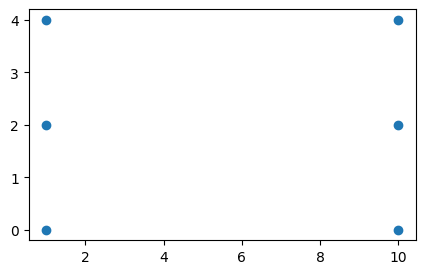

In [77]:
X = np.array([[1, 2], [1, 4], [1, 0],
            [10, 2], [10, 4], [10, 0]])
plt.scatter(X[:,0],X[:,1])
plt.rcParams["figure.figsize"] = (5,3)

In [88]:
# custom implementation
KMeans().fit_predict(X)

[LOG] New clusters: [[[1, 2], [1, 4], [1, 0]], [[10, 2], [10, 4], [10, 0]]]


[0, 0, 0, 1, 1, 1]

In [89]:
# sklearn implementation
from sklearn.cluster import KMeans as KMeans_sklearn
KMeans_sklearn(n_clusters=2).fit_predict(X)

c:\Users\user\miniconda3\envs\regular\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 1, 1, 1])

Since KMeans is deterministic and assigns a particular class to each datapoint, we can find an efficient numer of clusters by plotting maximum differences in distances inside clusters over iterations. This method is called "Elbow criterion". What it says is that after some time the intensity of change in distance is not going to be significant and that would allow us to choose the most optimal $K$ that yeilds the most difference in distances:
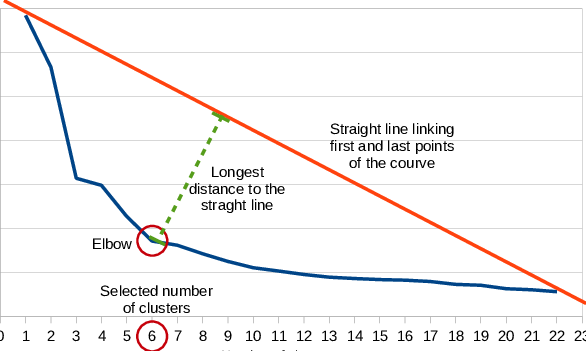